# 第２章　分類

### 2.1　ロジスティック回帰

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# ロジスティック曲線を定義
def f(x):
    return np.exp(beta_0 + beta * x) / (1 + np.exp(beta_0 + beta * x))

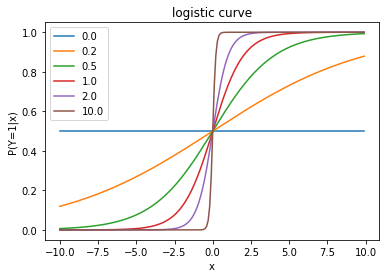

In [6]:
beta_0 = 0
beta_seq = np.array([0, 0.2, 0.5, 1, 2, 10])
x_seq = np.arange(-10, 10, 0.1)
plt.xlabel('x')
plt.ylabel('P(Y=1|x)')
plt.title('logistic curve')
for i in range(beta_seq.shape[0]):
    beta = beta_seq[i]
    p = f(x_seq)
    plt.plot(x_seq, p, label =f'{beta}')
plt.legend(loc='upper left')

### 2.2　Newton-Raphson法の適用

In [26]:
# f(x) = x^2 - 1 を例に考える
def f(x):
    return x**2 - 1
def df(x):
    return 2 * x

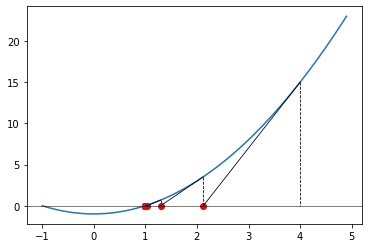

In [28]:
x_seq = np.arange(-1, 5, 0.1)
f_x = f(x_seq)
plt.plot(x_seq, f_x)
plt.axhline(y=0, c='black', linewidth=0.5)
plt.xlabel = 'x'
plt.ylabel = 'f(x)'
x = 4
for i in range(10):
    X, Y = x, f(x)
    x = x - f(x) / df(x)
    y = f(x)
    plt.plot([X, x], [Y, 0], c='black', linewidth=0.8)
    plt.plot([X, X], [Y, 0], c='black', linestyle='dashed', linewidth=0.8)
    plt.scatter(x, 0, c='red')


In [29]:
# f(x, y) = x^2 + y^2 - 1, g(x, y) = x + y の例を考える
def f(z):
    return z[0] ** 2 + z[1] ** 2 -1
def dfx(z):
    return 2 * z[0]
def dfy(z):
    return 2 * z[1]
def g(z):
    return z[0] + z[1]
def dgx(z):
    return 1
def dgy(z):
    return 1

In [30]:
z = np.array([3, 4]) # 初期値
for i in range(10):
    J = np.array([[dfx(z), dfy(z)], [dgx(z), dgy(z)]])
    z = z - np.linalg.inv(J)@np.array([f(z), g(z)])
z

array([-0.70710678,  0.70710678])

In [41]:
# 負の対数尤度を最小化する解を求める
N = 1000
p = 2
X = np.random.randn(N, p)
X = np.insert(X, 0, 1, axis=1)
beta = np.random.randn(p+1)
y = []
prob = 1 / (1 + np.exp(X@beta))
for i in range(N):
    if (np.random.rand(1) > prob[1]):
        y.append(1)
    else:
        y.append(-1)
# データの生成はここまで
beta # ベータの確認

array([ 1.99418749,  0.48835905, -0.07418146])

In [43]:
# 最尤推定
beta = np.inf
gamma = np.random.randn(p+1) # ベータの初期値
print(gamma)
while (np.sum(beta - gamma) ** 2) > 0.001:
    beta = gamma
    s = X@beta
    v = np.exp(-s*y)
    u = (y * v) / (1 + v)
    w = v / ((1 + v) ** 2)
    W = np.diag(w)
    z = s + u / w
    gamma = np.linalg.inv(X.T@W@X)@X.T@W@z
    print(gamma)

[1.2701532  0.20312354 0.33076731]
[2.37686543 0.09089198 0.16010799]
[ 3.06384404e+00 -8.28187747e-04  3.20934088e-02]
[ 3.39677097 -0.09915014 -0.10000519]
[ 3.48245456 -0.14055201 -0.15294577]


### 2.3　線形識別と二次識別

人工的にサンプルを発生させて，$y = \pm 1$ の $x$ の平均，共分散を推定して境界を生成する

In [ ]:
# 真のパラメータ
mu_1 = np.array([2, 2])
sigma_1 = 2
sigma_2 = 2
rho_1 = 0
mu_2 = np.array([-3, -3])
sigma_3 =  1
sigma_4 = 1
rho_2 = -0.8

# 真のパラメータに基づいてデータを発生
n = 100
u = np.random.randn(n)
v = np.random.randn(n)
x_1 = sigma_1 * u + mu_1[0]
y_1 = (rho_1 * u + np.sqrt(1 - rho_1 ** 2) * v) * sigma_2 + mu_1[1]
u = np.random.randn(n)
v = np.random.randn(n)
x_2 = sigma_3 * u + mu_2[0]
y_1 = (rho_2 * u + np.sqrt(1 - rho_2 ** 2) * v) * sigma_4 + mu_2[1]

# データからパラメータを推定
mu_1 = np.average((x_1, y_1), 1)
mu_2 = np.average((x_2, y_2), 1)
df = np.array([x_1, y_1])
mat = np.cov(df, rowvar=1)
inv_1 = np.linalg.inv(mat)
de_1 = np.linalg.det(mat)
df = np.array([x_2, y_2])
mat = np.cov(df, rowvar=1)
inv_2 = np.linalg.inv(mat)
de_2 = np.linalg.det(mat)

# 推定されたパラメータを分布の式に代入